# PROJECT: CLEAN AND ANALYZE EMPLOYEE EXIT SURVEYS

In this guided project, we'll work with exit surveys from employees of the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

In this project, we'll play the role of data analyst and pretend our stakeholders want to know the following:

- Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Features from the dataset to focus the analysis:
- Lenght of employment
- Age
- Reason for ceasing employment (several columns*)

Below is a preview of a few columns we'll work with from the dete_survey.csv:

- ID: An id used to identify the participant of the survey
- SeparationType: The reason why the person's employment ended
- Cease Date: The year or month the person's employment ended
- DETE Start Date: The year the person began employment with the DETE

Below is a preview of a few columns we'll work with from the tafe_survey.csv:

- Record ID: An id used to identify the participant of the survey
- Reason for ceasing employment: The reason why the person's employment ended
- LengthofServiceOverall. Overall Length of Service at Institute (in years): The length of the person's employment (in years)

In [1]:
#Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Load data
dete_survey = pd.read_csv('dete_survey.csv', encoding='UTF-8',
                         na_values=['Not Stated'])
tafe_survey = pd.read_csv('tafe_survey.csv', encoding="UTF-8")

# Initial analysis of DETE Survey

In [3]:
#Check dete_survey
dete_survey.head(3)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984.0,2004.0,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,NaN,NaN,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011.0,2011.0,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN


In [4]:
#Check dete_survey
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
ID                                     822 non-null int64
SeparationType                         822 non-null object
Cease Date                             788 non-null object
DETE Start Date                        749 non-null float64
Role Start Date                        724 non-null float64
Position                               817 non-null object
Classification                         455 non-null object
Region                                 717 non-null object
Business Unit                          126 non-null object
Employment Status                      817 non-null object
Career move to public sector           822 non-null bool
Career move to private sector          822 non-null bool
Interpersonal conflicts                822 non-null bool
Job dissatisfaction                    822 non-null bool
Dissatisfaction with the department    822 non-null bool
Physical work envir

In [5]:
#Extract columns
dete_survey_columns = dete_survey.columns

In [6]:
print(dete_survey_columns)

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Professional Development',
       'Opportunities for promotion', 'Staff morale', 'Workplace issue',
       'Physical environment', 'Worklife balance',
       'Stress and pressure support', 'Performance of supervisor',
       'Peer support', 'Initiative', 'Skills', 'Coach', 'Career Aspirations',
       'Feedback', 'Further PD', 'Communication', 'My say', 'Inform

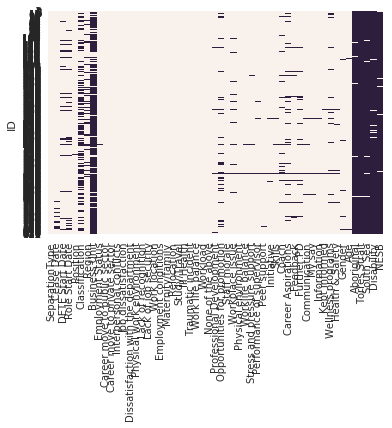

In [7]:
#Check missing values with heatmap
dete_survey_updated = dete_survey.set_index('ID')
sns.heatmap(dete_survey_updated.isnull(), cbar=False)

In [8]:
# Percentage of missing data per columns (Not Stated = NaN)
dete_missing = dete_survey.isnull().sum()/dete_survey.shape[0]
dete_missing.sort_values(ascending=False).head(10)

Torres Strait                  0.996350
South Sea                      0.991484
Aboriginal                     0.980535
Disability                     0.972019
NESB                           0.961071
Business Unit                  0.846715
Classification                 0.446472
Region                         0.127737
Role Start Date                0.119221
Opportunities for promotion    0.105839
dtype: float64

In [9]:
dete_survey['Disability'].value_counts(dropna=False)

NaN    799
Yes     23
Name: Disability, dtype: int64

In [10]:
dete_survey['Job dissatisfaction'].value_counts(dropna=False)

False    733
True      89
Name: Job dissatisfaction, dtype: int64

In [11]:
dete_survey['Age'].value_counts(dropna=False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

General Obervations:
- Job dissatisfaction is in the format True/False
- The Dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN
- Mant columns contain information that is not needed for this analysis > to be removed
- Columns to focus analysis: job dissatisfaction, age, Cease Date, Start Date


In [12]:
#Columns that can be removed 
dete_survey_columns[28:49]

Index(['Professional Development', 'Opportunities for promotion',
       'Staff morale', 'Workplace issue', 'Physical environment',
       'Worklife balance', 'Stress and pressure support',
       'Performance of supervisor', 'Peer support', 'Initiative', 'Skills',
       'Coach', 'Career Aspirations', 'Feedback', 'Further PD',
       'Communication', 'My say', 'Information', 'Kept informed',
       'Wellness programs', 'Health & Safety'],
      dtype='object')

In [13]:
#Drop Columns that we don't need for our analysis
dete_survey_updated = dete_survey.drop(dete_survey_columns[28:49], 
                                       axis =1)

#The updated dataframe
print(dete_survey_updated.shape)
print(dete_survey_updated.columns)

(822, 35)
Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')


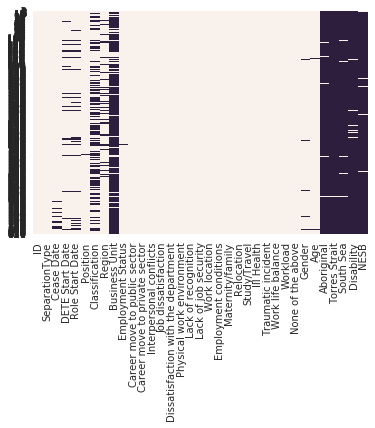

In [14]:
#Check missing values with heatmap
sns.heatmap(dete_survey_updated.isnull(), cbar=False)

# Initial Analysis of TAFE Survey

In [15]:
#Check dete_survey
tafe_survey.head(3)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
Record ID                                                                                                                                                        702 non-null float64
Institute                                                                                                                                                        702 non-null object
WorkArea                                                                                                                                                         702 non-null object
CESSATION YEAR                                                                                                                                                   695 non-null float64
Reason for ceasing employment                                                                                                                                    701 non-

In [17]:
#Extract columns
tafe_survey_columns = tafe_survey.columns

In [18]:
print(tafe_survey_columns)

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate oppo

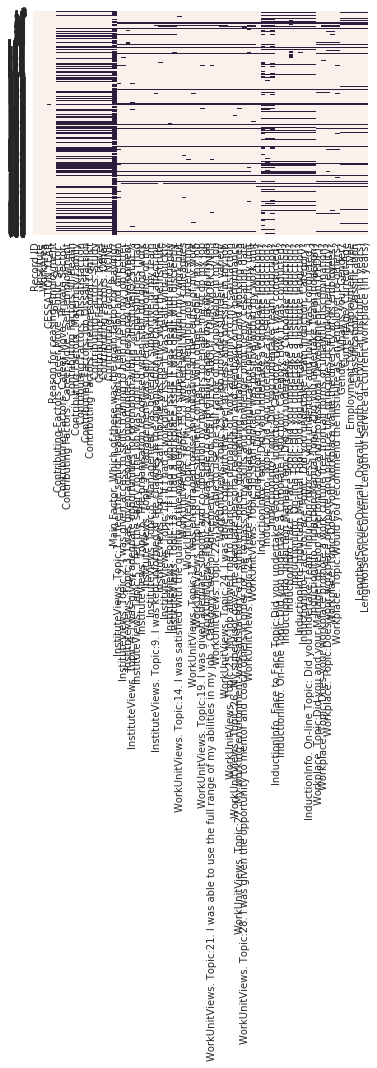

In [19]:
#Check missing values with heatmap
sns.heatmap(tafe_survey.isnull(), cbar=False)

In [20]:
# Percentage of missing data per columns > Top columns should be dropped
tafe_missing = tafe_survey.isnull().sum()/tafe_survey.shape[0]
tafe_missing.sort_values(ascending=False).head(20)

Main Factor. Which of these was the main factor for leaving?                                                 0.839031
InductionInfo. Topic:Did you undertake a Corporate Induction?                                                0.384615
Contributing Factors. Ill Health                                                                             0.377493
Contributing Factors. Maternity/Family                                                                       0.377493
Contributing Factors. Career Move - Public Sector                                                            0.377493
Contributing Factors. NONE                                                                                   0.377493
Contributing Factors. Other                                                                                  0.377493
Contributing Factors. Dissatisfaction                                                                        0.377493
Contributing Factors. Career Move - Self-employment     

In [21]:
tafe_survey['Reason for ceasing employment'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: Reason for ceasing employment, dtype: int64

In [22]:
tafe_survey['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         371
NaN                                       265
Contributing Factors. Dissatisfaction      66
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [23]:
tafe_survey['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      360
NaN                    265
Job Dissatisfaction     77
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [24]:
#'Main Factor. Which of these was the main factor for leaving?'
tafe_survey['Main Factor. Which of these was the main factor for leaving?'].value_counts(dropna=False)

NaN                                         589
Dissatisfaction with %[Institute]Q25LBL%     23
Job Dissatisfaction                          22
Other                                        18
Career Move - Private Sector                 16
Interpersonal Conflict                        9
Career Move - Public Sector                   8
Maternity/Family                              6
Career Move - Self-employment                 4
Ill Health                                    3
Travel                                        2
Study                                         2
Name: Main Factor. Which of these was the main factor for leaving?, dtype: int64

General observations:
    - Contributing factor/reason are not standardized (see above)
    - Rename columns for cohesive layout
    - Reason columns with high NaN contain information (assuming NaN=No/-)
    - Many columns contain repeteated information

In [25]:
#Columns that can be removed B/C don't add value to the analysis
tafe_survey_columns[17:66]

Index(['Main Factor. Which of these was the main factor for leaving?',
       'InstituteViews. Topic:1. I feel the senior leadership had a clear vision and direction',
       'InstituteViews. Topic:2. I was given access to skills training to help me do my job better',
       'InstituteViews. Topic:3. I was given adequate opportunities for personal development',
       'InstituteViews. Topic:4. I was given adequate opportunities for promotion within %Institute]Q25LBL%',
       'InstituteViews. Topic:5. I felt the salary for the job was right for the responsibilities I had',
       'InstituteViews. Topic:6. The organisation recognised when staff did good work',
       'InstituteViews. Topic:7. Management was generally supportive of me',
       'InstituteViews. Topic:8. Management was generally supportive of my team',
       'InstituteViews. Topic:9. I was kept informed of the changes in the organisation which would affect me',
       'InstituteViews. Topic:10. Staff morale was positive w

In [26]:
#Drop Columns that we don't need for our analysis
tafe_survey_updated = tafe_survey.drop(tafe_survey_columns[17:66], 
                                       axis =1)

#The updated dataframe
print(tafe_survey_updated.shape)
print(tafe_survey_updated.columns)

(702, 23)
Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
     

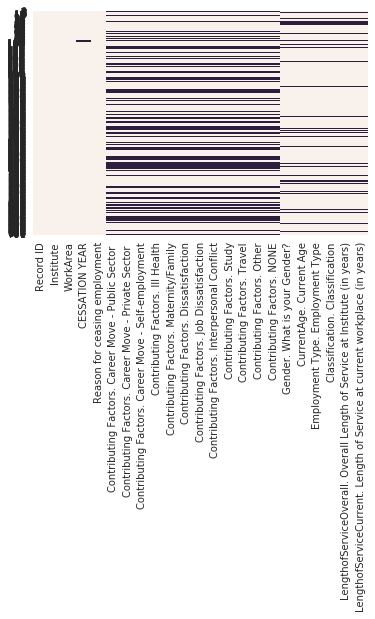

In [27]:
#Check missing values of updated df with heatmap
sns.heatmap(tafe_survey_updated.isnull(), cbar=False)

# Update column names

Each dataframe contains many of the same columns, but the column names are different. Because we eventually want to combine them, we'll have to standardize the column names.

dete_survey_updated dataframe:

Rename the remaining columns following the criteria:
- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

In [28]:
#dete_survey_update
dete_survey_updated.columns

Index(['ID', 'SeparationType', 'Cease Date', 'DETE Start Date',
       'Role Start Date', 'Position', 'Classification', 'Region',
       'Business Unit', 'Employment Status', 'Career move to public sector',
       'Career move to private sector', 'Interpersonal conflicts',
       'Job dissatisfaction', 'Dissatisfaction with the department',
       'Physical work environment', 'Lack of recognition',
       'Lack of job security', 'Work location', 'Employment conditions',
       'Maternity/family', 'Relocation', 'Study/Travel', 'Ill Health',
       'Traumatic incident', 'Work life balance', 'Workload',
       'None of the above', 'Gender', 'Age', 'Aboriginal', 'Torres Strait',
       'South Sea', 'Disability', 'NESB'],
      dtype='object')

In [29]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [30]:
dete_survey_updated.columns

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')

tafe_survey_updated dataframe:

Rename columns to guaratee consistency with date_survey_updated


In [31]:
#tafe_survey_update
tafe_survey_updated.columns

Index(['Record ID', 'Institute', 'WorkArea', 'CESSATION YEAR',
       'Reason for ceasing employment',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE',
       'Gender. What is your Gender?', 'CurrentAge. Current Age',
       'Employment Type. Employment Type', 'Classification. Classification',
       'LengthofServiceOverall. Overall Length of Service at Institute (in years)',
       'LengthofServiceCurrent. Length of Service at current workplace (in years)'],
      dtype='ob

In [32]:
new_columns_dict = {'Record ID': 'id', 'CESSATION YEAR': 'cease_date',
                   'Reason for ceasing employment': 'separationtype',
                   'Gender. What is your Gender?': 'gender',
                   'CurrentAge. Current Age': 'age',
                   'Employment Type. Employment Type': 'employment_status',
                   'Classification. Classification': 'position',
                   'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
                   'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'}

In [33]:
#rename the columns of tafe_survey_update 
tafe_survey_updated.rename(columns=new_columns_dict, inplace=True)

In [34]:
tafe_survey_updated.head(2)

,id,Institute,WorkArea,cease_date,separationtype,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Contributing Factors. Study,Contributing Factors. Travel,Contributing Factors. Other,Contributing Factors. NONE,gender,age,employment_status,position,institute_service,role_service
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,-,Travel,-,-,NaN,NaN,NaN,NaN,NaN,NaN


# Data processing: focus on employees who resigned

In [35]:
tafe_survey_updated['separationtype'].value_counts(dropna=False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [36]:
dete_survey_updated['separationtype'].value_counts(dropna=False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [37]:
#Create mask with only resignations
mask_tafe = tafe_survey_updated['separationtype']=='Resignation'

mask_dete1 = dete_survey_updated['separationtype']=='Resignation-Other reasons'
mask_dete2 = dete_survey_updated['separationtype']=='Resignation-Other employer'
mask_dete3 = dete_survey_updated['separationtype']=='Resignation-Move overseas/interstate'

In [38]:
dete_resignations = dete_survey_updated[mask_dete1 | mask_dete2 | mask_dete3].copy()
tafe_resignations = tafe_survey_updated[mask_tafe].copy()

# Data processing: cease_date and dete_start_date

- Since the cease_date is the last year of the person's employment and the dete_start_date is the person's first year of employment, it wouldn't make sense to have years after the current date.
- Given that most people in this field start working in their 20s, it's also unlikely that the dete_start_date was before the year 1940.

If we have many years higher than the current date or lower than 1940, we wouldn't want to continue with our analysis, because it could mean there's something very wrong with the data. If there are a small amount of values that are unrealistically high or low, we can remove them.

In [39]:
dete_resignations[['cease_date','dete_start_date']].head(3)

,cease_date,dete_start_date
3,05/2012,2005.0
5,05/2012,1994.0
8,07/2012,2009.0


In [40]:
dete_resignations['cease_date'].value_counts(ascending=False, dropna=False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
NaN         11
09/2013     11
07/2013      9
11/2013      9
10/2013      6
08/2013      4
05/2013      2
05/2012      2
09/2010      1
07/2006      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

In [41]:
#Extract the year
pattern =r"([1-2][0-9]{3})"

dete_resignations['cease_date'] = dete_resignations['cease_date'].str.extract(pattern).astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: FutureWarning:

currently extract(expand=None) means expand=False (return Index/Series/DataFrame) but in a future version of pandas this will be changed to expand=True (return DataFrame)



In [42]:
dete_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

 2014.0     22
 2013.0    146
 2012.0    129
 2010.0      2
 2006.0      1
NaN         11
Name: cease_date, dtype: int64

In [43]:
dete_resignations['dete_start_date'].value_counts(dropna=False).sort_index(ascending=False)

 2013.0    10
 2012.0    21
 2011.0    24
 2010.0    17
 2009.0    13
 2008.0    22
 2007.0    21
 2006.0    13
 2005.0    15
 2004.0    14
 2003.0     6
 2002.0     6
 2001.0     3
 2000.0     9
 1999.0     8
 1998.0     6
 1997.0     5
 1996.0     6
 1995.0     4
 1994.0     6
 1993.0     5
 1992.0     6
 1991.0     4
 1990.0     5
 1989.0     4
 1988.0     4
 1987.0     1
 1986.0     3
 1985.0     3
 1984.0     1
 1983.0     2
 1982.0     1
 1980.0     5
 1977.0     1
 1976.0     2
 1975.0     1
 1974.0     2
 1973.0     1
 1972.0     1
 1971.0     1
 1963.0     1
NaN        28
Name: dete_start_date, dtype: int64

In [44]:
dete_resignations['institute_service'] = dete_resignations['cease_date']-dete_resignations['dete_start_date']
dete_resignations['institute_service'].value_counts(dropna=False).head(10)

NaN     38
 5.0    23
 1.0    22
 3.0    20
 0.0    20
 6.0    17
 4.0    16
 9.0    14
 2.0    14
 7.0    13
Name: institute_service, dtype: int64

In [45]:
tafe_resignations['cease_date'].value_counts(dropna=False).sort_index(ascending=False)

 2013.0     55
 2012.0     94
 2011.0    116
 2010.0     68
 2009.0      2
NaN          5
Name: cease_date, dtype: int64

In [46]:
tafe_resignations['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

Observations:
1. There aren't any major issues with the years.

2. There is a common trend in both TAFE and DETE datasets: employees with less years of service are more likely to resign.

3. Calculated field in DETE: years of service in the institution

# Data processing: Dissatisfaction

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe:
tafe_survey_updated:
- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

dete_survey_updated:
- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employee indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

In [47]:
#Attention on how the information is coded > It needs to be converted!
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [48]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [49]:
dete_resignations['job_dissatisfaction'].value_counts()

False    270
True      41
Name: job_dissatisfaction, dtype: int64

In [50]:
dete_resignations['dissatisfaction_with_the_department'].value_counts()

False    282
True      29
Name: dissatisfaction_with_the_department, dtype: int64

In [51]:
#TAFE Survey: convert Dissatisfaction data into True/False/NaN

def update_vals(value): 
    if pd.isnull(value):
        return np.nan
    elif value == '-':
        return False
    else:
        return True

tafe_resignations['Contributing Factors. Job Dissatisfaction'] = tafe_resignations['Contributing Factors. Job Dissatisfaction'].apply(update_vals)
tafe_resignations['Contributing Factors. Dissatisfaction'] = tafe_resignations['Contributing Factors. Dissatisfaction'].apply(update_vals)

In [52]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna=False)

False    270
True      62
NaN        8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [53]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna=False)

False    277
True      55
NaN        8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [54]:
#Create a new columns that summarizes the two previous ones
columns = ['Contributing Factors. Job Dissatisfaction',
          'Contributing Factors. Dissatisfaction']

tafe_resignations['dissatisfied'] = tafe_resignations[columns].any(axis=1, 
                                                                   skipna=False)

In [55]:
tafe_resignations['dissatisfied'].value_counts(dropna=False)

False    241
True      91
NaN        8
Name: dissatisfied, dtype: int64

In [56]:
#DETE Survey: Create a new columns that summarizes the two previous ones

columns_dete=['job_dissatisfaction','dissatisfaction_with_the_department',
              'physical_work_environment','lack_of_recognition',
              'lack_of_job_security','work_location',
             'employment_conditions','work_life_balance',
             'workload']

dete_resignations['dissatisfied'] = dete_resignations[columns_dete].any(axis=1, 
                                                                   skipna=False)

In [57]:
dete_resignations['dissatisfied'].value_counts(dropna=False)

False    162
True     149
Name: dissatisfied, dtype: int64

In [58]:
#Create a copy of both df
dete_resignations_up = dete_resignations.copy()
tafe_resignations_up = tafe_resignations.copy()

# TAFE: Years of service

We will reclassify the data in the institute_service column following the below definitions:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [59]:
tafe_resignations_up['institute_service'].value_counts(dropna=False)

Less than 1 year      73
1-2                   64
3-4                   63
NaN                   50
5-6                   33
11-20                 26
7-10                  21
More than 20 years    10
Name: institute_service, dtype: int64

In [60]:
#Convert to string
tafe_resignations_up['institute_service']= tafe_resignations_up['institute_service'].astype('str')

In [61]:
#Convert years of service to float
conversion={'Less than 1 year':'1', '1-2':'2', '3-4':'4', 
            '5-6':'6', '11-20':'15', '7-10':'8',
           'More than 20 years':'21'}

tafe_resignations_up['institute_service'] = tafe_resignations_up['institute_service'].map(conversion).astype(float)

In [62]:
tafe_resignations_up['institute_service'].value_counts(dropna=False)

 1.0     73
 2.0     64
 4.0     63
NaN      50
 6.0     33
 15.0    26
 8.0     21
 21.0    10
Name: institute_service, dtype: int64

# Combination of datasets

In [63]:
#Flag each dataset
dete_resignations_up['institute']='DETE'
tafe_resignations_up['institute']='TAFE'

In [64]:
#Combine both datasets
combined = pd.concat([dete_resignations_up,tafe_resignations_up],
                    axis=0)

In [65]:
#Check combined dataframe
combined[['institute_service','dissatisfied','institute']]

,institute_service,dissatisfied,institute
3,7.0,False,DETE
5,18.0,True,DETE
8,3.0,False,DETE
9,15.0,True,DETE
11,3.0,False,DETE
12,14.0,False,DETE
14,5.0,True,DETE
16,NaN,True,DETE
20,30.0,False,DETE
21,32.0,False,DETE


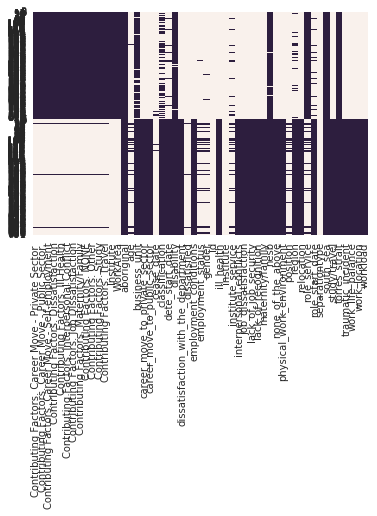

In [66]:
#Check missing values with heatmap
sns.heatmap(combined.isnull(), cbar=False)

In [67]:
#drop columns with more than 500 missing values 
combined_updated = combined.dropna(axis=1, thresh=500)

In [68]:
combined_updated.head(2)

,age,cease_date,dissatisfied,employment_status,gender,id,institute,institute_service,position,separationtype
3,36-40,2012.0,False,Permanent Full-time,Female,4.0,DETE,7.0,Teacher,Resignation-Other reasons
5,41-45,2012.0,True,Permanent Full-time,Female,6.0,DETE,18.0,Guidance Officer,Resignation-Other reasons


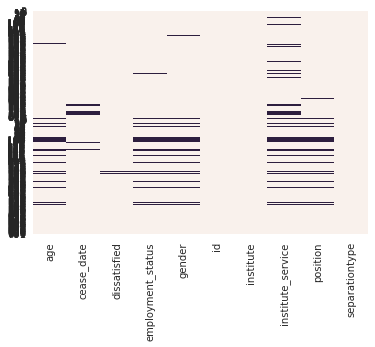

In [69]:
#Check missing values with heatmap
sns.heatmap(combined_updated.isnull(), cbar=False)

# Data Processing: institute_service

We will reclassify the data in the institute_service column following the below definitions:
- New: Less than 3 years at a company
- Experienced: 3-6 years at a company
- Established: 7-10 years at a company
- Veteran: 11 or more years at a company

In [70]:
combined_updated['institute_service'].value_counts(dropna=False)

 1.0     95
NaN      88
 4.0     79
 2.0     78
 6.0     50
 15.0    33
 8.0     29
 5.0     23
 3.0     20
 0.0     20
 9.0     14
 21.0    13
 7.0     13
 13.0     8
 20.0     7
 12.0     6
 22.0     6
 10.0     6
 17.0     6
 14.0     6
 16.0     5
 18.0     5
 24.0     4
 23.0     4
 11.0     4
 32.0     3
 39.0     3
 19.0     3
 28.0     2
 25.0     2
 36.0     2
 26.0     2
 30.0     2
 42.0     1
 27.0     1
 29.0     1
 35.0     1
 41.0     1
 49.0     1
 38.0     1
 34.0     1
 33.0     1
 31.0     1
Name: institute_service, dtype: int64

In [71]:
#Create a function that maps the years of service in the above buckets

def update_years_service(value): 
    if pd.isnull(value):
        return np.nan
    elif value < 3:
        return "New"
    elif (value >= 3) and (value<7):
        return 'Experienced'
    elif (value >= 7) and (value<11):
        return 'Established'
    else:
        return 'Veteran'

In [72]:
combined_updated['service_cat'] = combined_updated['institute_service'].apply(update_years_service)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



# Fill missing values and Analysis

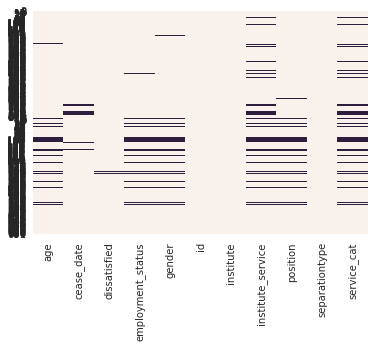

In [73]:
#Check missing values with heatmap
sns.heatmap(combined_updated.isnull(), cbar=False)

In [74]:
combined_updated['dissatisfied'].value_counts(dropna=False)

False    403
True     240
NaN        8
Name: dissatisfied, dtype: int64

In [75]:
#Fill missing values with False (=most common observation)
combined_updated['dissatisfied'].fillna(False, inplace=True)

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/generic.py:4355: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [76]:
#group dataframe by service_cat
pv_combined = combined_updated.pivot_table(values='dissatisfied',
                                          index='service_cat',
                                          aggfunc=np.mean, margins=True)

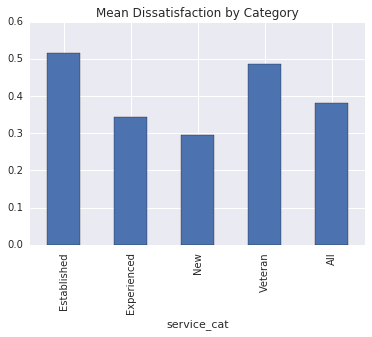

In [78]:
pv_combined.plot(kind='bar', 
                 title='Mean Dissatisfaction by Category', 
                 legend=False)

# Next Steps

- Decide how to handle the rest of the missing values. Then, aggregate the data according to the service_cat column again. How many people in each career stage resigned due to some kind of dissatisfaction?
- Clean the age column. How many people in each age group resgined due to some kind of dissatisfaction?
- Instead of analyzing the survey results together, analyze each survey separately. Did more employees in the DETE survey or TAFE survey end their employment because they were dissatisfied in some way?

In [80]:
#Age: fill missing values
combined_updated['age'].value_counts()

51-55            71
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
31  35           32
36  40           32
26  30           32
31-35            29
21-25            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

In [81]:
#Convert 'age' to float and assing to new column 'age_num'
conversion={'20 or younger':'20', '61 or older':'61', 
            '56-60':'58','31-35':'33','21-25':'23',
            '56 or older':'56','36  40':'38',
            '26  30':'28','31  35':'33','21  25':'23',
            '26-30':'28','46  50':'48','36-40':'38','46-50':'48',
            '41  45':'43','41-45':'43','51-55':'53'}

combined_updated['age_num'] = combined_updated['age'].map(conversion).astype(float)

/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [82]:
combined_updated['age_num'].mean()

41.06375838926174

In [86]:
#fill missing values in 'age_num' with average age (41 years)
combined_updated.loc[combined_updated['age_num'].isnull(),'age_num']=41

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [89]:
#Fill in missing values in 'position' with 'Administration (AO)'
combined_updated['position'].value_counts().head(3)

Administration (AO)        148
Teacher                    129
Teacher (including LVT)     95
Name: position, dtype: int64

In [90]:
combined_updated.loc[combined_updated['position'].isnull(),'position']='Administration (AO)'

/dataquest/system/env/python3/lib/python3.4/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In order to analyze how many people in each career stage resigned due to some kind of dissatisfaction we will plot the dataset

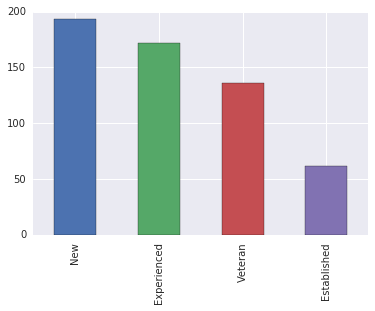

In [101]:
#group dataframe by service_cat
combined_updated['service_cat'].value_counts().plot(kind='bar')

Conclusions:
    - The total amount of resignations is higher among "new" and "experienced" employees.
    - These two groups present lower average dissatisfaction than the rest of the groups.
    - This lead to think that there are other factor other than job dissatisfaction driving the employees atrition.